# Notebook to process imputed data of Brienzi

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import h5py
import matplotlib.cm as cm
import itertools as it
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)

    
if socket_name.startswith("bionc"):
    print("Leipzig Cluster detected!")
    path = "/mnt/archgen/users/hringbauer/brienzi/"
    #sys.path.append("/mnt/archgen/users/hringbauer/data/malta/") 
    
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

from ancIBD.IO.prepare_h5 import vcf_to_1240K_hdf

bionc21
Leipzig Cluster detected!
/mnt/archgen/users/hringbauer/brienzi
CPU Count: 40


### Explore VCF

In [10]:
#p = "/mnt/archgen/users/hringbauer/brienzi/data/splitbam/Brienzi.trio.lib.vcf.gz"
p = "/mnt/archgen/users/hringbauer/brienzi/data/splitbam/Brienzi.trio.lib.vcf.gz"

In [ ]:
!bcftools view $p | head -80

## 0) Explore: Downsample to target SNP set
Here: Try 1240k

In [4]:
%%time 

for ch in range(1,22):
    print(f"Running Chromosome {ch}...")

    in_vcf_path = "/mnt/archgen/users/hringbauer/brienzi/data/splitbam/Brienzi.trio.lib.vcf.gz"
    marker_path = f"/mnt/archgen/users/hringbauer/data/1240kSNPs/bcftools_ch{ch}.csv"
    out_vcf_path = f"/mnt/archgen/users/hringbauer/brienzi/data/vcf1240k.imputed/v{v}.imputed.ch{ch}.vcf.gz"

    !bcftools view -Oz -o {out_vcf_path} -T {marker_path} -M2 -v snps {in_vcf_path}
    print("Indexing...")
    !bcftools index {out_vcf_path}

CPU times: user 7.84 s, sys: 1.43 s, total: 9.26 s
Wall time: 3min 58s


# 1) Create 1240 imputed HDF5 (for easier processing)

In [ ]:
%%time

for ch in range(1,23):
    print(f"Running Chromosome {ch}...")
    v = 0.2

    vcf_to_1240K_hdf(in_vcf_path = "/mnt/archgen/users/hringbauer/brienzi/data/splitbam/Brienzi.trio.lib.vcf.gz",
             path_vcf = f"/mnt/archgen/users/hringbauer/brienzi/data/vcf1240k.imputed/v{v}.imputed.ch{ch}.vcf.gz",
             path_h5 = f"/mnt/archgen/users/hringbauer/brienzi/data/h5.imputed/v{v}.imputed.ch{ch}.h5",
             marker_path = f"/mnt/archgen/users/hringbauer/data/1240kSNPs/bcftools_ch{ch}.csv",
             map_path = f"/mnt/archgen/users/hringbauer/data/afs/v51.1_1240k.snp", 
             af_path = f"/mnt/archgen/users/hringbauer/data/afs/v51.1_1240k_AF_ch{ch}.tsv",
             col_sample_af = "AF_SAMPLE",
             ch=ch, 
             chunk_length=10000)

Running Chromosome 2...
Print downsampling to 1240K...
Running bash command: 
bcftools view -Oz -o /mnt/archgen/users/hringbauer/brienzi/data/vcf1240k.imputed/v0.2.imputed.ch2.vcf.gz -T /mnt/archgen/users/hringbauer/data/1240kSNPs/bcftools_ch2.csv -M2 -v snps /mnt/archgen/users/hringbauer/brienzi/data/splitbam/Brienzi.trio.lib.vcf.gz
Finished BCF tools filtering to target markers.
Converting to HDF5...
Finished conversion to hdf5!
Merging in LD Map..
Lifting LD Map from eigenstrat to HDF5...
Loaded 95309 variants.
Loaded 3 individuals.
Loaded 98657 Chr.2 1240K SNPs.
Intersection 94799 out of 95309 HDF5 SNPs
Interpolating 510 variants.
Finished Chromosome 2.
Adding map to HDF5...
Calculating in sample allele frequencies and saving at hdf5 column AF_SAMPLE
Adding Allele Frequencies to HDF5...
Loaded 95309 variants.
Finshed merged in allele frequencies into /mnt/archgen/users/hringbauer/brienzi/data/h5.imputed/v0.2.imputed.ch2.h5
Intersection 93471 out of 95309 target HDF5 SNPs. 1838 SNPs

### 1b) Create 1000G imputed HDF

In [ ]:
%%time

for ch in range(1,23):
    print(f"Running Chromosome {ch}...")
    v = 0.2

    vcf_to_1240K_hdf(in_vcf_path = "/mnt/archgen/users/hringbauer/brienzi/data/splitbam/Brienzi.trio.lib.vcf.gz",
             path_vcf = "",
             path_h5 = f"/mnt/archgen/users/hringbauer/brienzi/data/h5.imputed.1000G/v{v}.imputed.ch{ch}.h5",
             marker_path = "",
             map_path = "", 
             af_path = "",
             col_sample_af = "AF_SAMPLE",
             ch=ch, 
             chunk_length=10000)

Running Chromosome 1...
Print downsampling to 1240K...
Converting to HDF5...


In [76]:
print("finished")

finished


## 1c) Create 23andme SNP imputed HDF
Use the 23andme bcftools SNP file created over in `prep_snpset.ipynb`

In [117]:
%%time

for ch in range(1,23):
    print(f"Running Chromosome {ch}...")
    v = 0.2

    vcf_to_1240K_hdf(in_vcf_path = "/mnt/archgen/users/hringbauer/brienzi/data/splitbam/Brienzi.trio.lib.vcf.gz",
             path_vcf = f"/mnt/archgen/users/hringbauer/brienzi/data/vcf23andme.imputed/v{v}.imputed.ch{ch}.vcf.gz",
             path_h5 = f"/mnt/archgen/users/hringbauer/brienzi/data/h5.imputed.23andme/v{v}.imputed.ch{ch}.h5",
             marker_path = f"/mnt/archgen/users/hringbauer/git/gedmatch_prep/data/23andme/bcftools_ch{ch}.csv",
             map_path = "", 
             af_path = "",
             col_sample_af = "AF_SAMPLE",
             ch=ch, 
             chunk_length=10000)

Running Chromosome 1...
Print downsampling to 1240K...
Running bash command: 
bcftools view -Oz -o /mnt/archgen/users/hringbauer/brienzi/data/vcf23andme.imputed/v0.2.imputed.ch1.vcf.gz -T /mnt/archgen/users/hringbauer/git/gedmatch_prep/data/23andme/bcftools_ch1.csv -M2 -v snps /mnt/archgen/users/hringbauer/brienzi/data/splitbam/Brienzi.trio.lib.vcf.gz
Finished BCF tools filtering to target markers.
Converting to HDF5...
Finished conversion to hdf5!
Merging in LD Map..
Calculating in sample allele frequencies and saving at hdf5 column AF_SAMPLE
Adding Allele Frequencies to HDF5...
Loaded 42714 variants.
Finshed merged in allele frequencies into /mnt/archgen/users/hringbauer/brienzi/data/h5.imputed.23andme/v0.2.imputed.ch1.h5
Transformation complete! Find new hdf5 file at: /mnt/archgen/users/hringbauer/brienzi/data/h5.imputed.23andme/v0.2.imputed.ch1.h5

Running Chromosome 2...
Print downsampling to 1240K...
Running bash command: 
bcftools view -Oz -o /mnt/archgen/users/hringbauer/brienz

# 2) Filter to 23andme data
SNP files is prepered over in ./pre_snpsets.ipynb

In [109]:
ch = 3

path_23tsv ="/mnt/archgen/users/hringbauer/git/gedmatch_prep/data/23andme/snps.tsv"
df = pd.read_csv(path_23tsv, sep="\t", low_memory=False)

df_ch = df[df["chr"]==str(ch)] # 23andme SNP file for Chr
print(f"Subset to {len(df_ch)} SNPs")

Subset to 38517 SNPs


In [113]:
df_ch.sort_values(by="pos")

,rsid,chr,pos,gt
92790,rs13072188,3,63411,AC
92791,rs9681213,3,66894,AG
92792,rs115597985,3,70761,GT
92793,rs11128546,3,71283,CT
92794,i5005005,3,79467,AA
...,...,...,...,...
131302,rs6763122,3,197794284,CC
131303,rs9879842,3,197813975,GT
131304,rs12630742,3,197817764,AA
131305,rs61791886,3,197821958,GG


In [87]:
%%time

h5_path = f"/mnt/archgen/users/hringbauer/brienzi/data/h5.imputed.1000G/v0.2.imputed.ch{ch}.h5"

with h5py.File(h5_path, "r") as f: # Load for Sanity Check. See below!
    print(list(f["variants"]))
    print(np.shape(f["calldata/GT"]))
    pos = f["variants/POS"][:]
    ref = f["variants/REF"][:]
    alt = f["variants/ALT"][:]
    #af_all = f["variants/RAF"][:]
    #gp = f["calldata/GP"][:, :, :]
    #gt = f["calldata/GT"][:, :, :]
    #m = f["variants/MAP"][:]
    samples = f["samples"][:]
    #af=f["variants/AF"][:]

['AF', 'AF_SAMPLE', 'ALT', 'BUF', 'CHROM', 'FILTER_PASS', 'ID', 'INFO', 'POS', 'QUAL', 'RAF', 'REF', 'altlen', 'is_snp', 'numalt']
(78397748, 3, 2)


In [93]:
dft = pd.DataFrame({"pos":pos, "ref":ref.astype("str"), "alt":alt[:,0].astype("str")}) ### Prepare 1000G File

Subset to 38517 SNPs


In [97]:
dfm = pd.merge(dft, df_ch, on="pos") ### Merge the files

In [100]:
print(f"Merged to {len(dfm)}/{len(df_ch)} SNPs")

Merged to 50367/38517 SNPs


In [107]:
dfm.sort_values(by="pos")

,pos,ref,alt,rsid,chr,gt
4552,63411,A,C,rs13072188,3,AC
4553,66894,G,A,rs9681213,3,AG
4554,66894,T,C,rs9681213,3,AG
4555,70761,T,G,rs115597985,3,GT
4556,70761,C,T,rs115597985,3,GT
...,...,...,...,...,...,...
49488,197794284,C,T,rs6763122,3,CC
49489,197813975,T,G,rs9879842,3,GT
49490,197817764,A,C,rs12630742,3,AA
49491,197821958,G,A,rs61791886,3,GG


In [108]:
len(df_ch)

38517

# Area 51
Explore the hdf5 file

In [58]:
ch=3

with h5py.File(f"/mnt/archgen/users/hringbauer/brienzi/data/h5.imputed/v0.2.imputed.ch{ch}.h5", "r") as f: # Load for Sanity Check. See below!
    print(list(f["variants"]))
    print(np.shape(f["calldata/GT"]))
    #af = f["variants/AF"][:]
    af_all = f["variants/RAF"][:]
    gp = f["calldata/GP"][:, :, :]
    gt = f["calldata/GT"][:, :, :]
    #m = f["variants/MAP"][:]
    samples = f["samples"][:]
    #af=f["variants/AF"][:]
    
len(samples)

['AF', 'AF_ALL', 'AF_SAMPLE', 'ALT', 'BUF', 'CHROM', 'FILTER_PASS', 'ID', 'INFO', 'MAP', 'POS', 'QUAL', 'RAF', 'REF', 'altlen', 'is_snp', 'numalt']
(78523, 3, 2)


3

### maxGP Rate

In [63]:
gp_max = np.max(gp, axis=2)
np.mean(gp_max > 0.99, axis=0)

array([0.91770564, 0.79441692, 0.87178279])

### Heterozygote Rate

In [64]:
gt2 = np.sum(gt, axis=2)
np.mean(gt2==1, axis=0)

array([0.26880022, 0.26659705, 0.26821441])

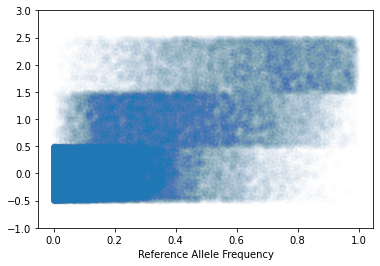

In [66]:
a = af_all[:,0]

plt.figure()
ax = plt.gca()
ax.scatter(a, gt2[:,0]+np.random.random(len(gt2)) - 0.5, alpha=0.01)

ax.set_ylim([-1,3])
ax.set_xlabel("Reference Allele Frequency")
plt.show()

In [73]:
s = gt2[:,1] == gt2[:,2]
np.mean(s)

0.9696522038128956

In [69]:
gp[~s]

array([[[0.128, 0.852, 0.02 ],
        [0.115, 0.884, 0.   ],
        [0.991, 0.009, 0.   ]],

       [[0.   , 0.752, 0.248],
        [0.   , 0.86 , 0.14 ],
        [0.   , 0.04 , 0.96 ]],

       [[0.999, 0.001, 0.   ],
        [0.347, 0.653, 0.   ],
        [1.   , 0.   , 0.   ]],

       ...,

       [[0.   , 1.   , 0.   ],
        [0.003, 0.462, 0.536],
        [0.006, 0.994, 0.   ]],

       [[1.   , 0.   , 0.   ],
        [0.305, 0.695, 0.   ],
        [0.987, 0.013, 0.   ]],

       [[0.965, 0.035, 0.   ],
        [1.   , 0.   , 0.   ],
        [0.408, 0.592, 0.   ]]], dtype=float32)

In [78]:
%%time

ch=22

with h5py.File(f"/mnt/archgen/users/hringbauer/brienzi/data/h5.imputed.1000G/v0.2.imputed.ch{ch}.h5", "r") as f: # Load for Sanity Check. See below!
    print(list(f["variants"]))
    print(np.shape(f["calldata/GT"]))
    #af = f["variants/AF"][:]
    af_all = f["variants/RAF"][:]
    gp = f["calldata/GP"][:, :, :]
    gt = f["calldata/GT"][:, :, :]
    #m = f["variants/MAP"][:]
    samples = f["samples"][:]
    #af=f["variants/AF"][:]
    
len(samples)

['AF', 'AF_SAMPLE', 'ALT', 'BUF', 'CHROM', 'FILTER_PASS', 'ID', 'INFO', 'POS', 'QUAL', 'RAF', 'REF', 'altlen', 'is_snp', 'numalt']
(78397748, 3, 2)
CPU times: user 10.9 s, sys: 3.08 s, total: 14 s
Wall time: 36.1 s


3

In [80]:
np.shape(gp)

(78397748, 3, 3)